We have participated in the competition Ada Lovelace Datathon 2021, we managed to score 11 th position in the leaderboard, we are publishing our attempts in the series of notebooks, rest of the notebook links are-

* [EDA and Data Visualization](https://www.kaggle.com/nawshadbintanizam/eda-allfeatures)
* [Handling Data Imbalance](https://www.kaggle.com/erabaka/classifier-experiments-with-resample)
* [Hardcoding Logistic Regression and Decision Tree](https://www.kaggle.com/nabilatasnim/hardcode-logisticregression-decisiontree)

In [1]:
# import libraries
#!pip install turicreate
import numpy as np
import pandas as pd
#import turicreate
from sklearn.preprocessing import OneHotEncoder

In [2]:
# libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Strategic imports
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Machine learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier

from tensorflow import keras
import tensorflow as tf

# imports to mute warnings
pd.options.display.max_rows=200
pd.set_option('mode.chained_assignment', None)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning)

print("sns.__version__", sns.__version__)
#print("sklearn.__version__", sklearn.__version__)

sns.__version__ 0.11.1


In [3]:
train = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_train.csv')
test = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_test.csv')

In [4]:
# summary stats
train.describe()

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
count,8.610000e+03,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,7282.000000,8610.000000,...,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
mean,1.072829e+09,3.424274,1.525784,46.088269,1.649826,1.939721,1.911498,1.619628,4.308981,1.956330,...,5.245412,4.046690,3.849361,2.706272,3.461208,4.031243,2.754704,3.697909,3.871893,0.180488
std,6.189227e+08,2.008436,0.499364,14.727426,1.118760,0.238016,0.284040,0.485506,2.653107,0.204372,...,1.872720,1.663155,1.873872,1.766552,1.829900,1.767684,1.753610,1.888003,2.048310,0.384616
min,3.652360e+05,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.360256e+08,2.000000,1.000000,34.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,0.000000
50%,1.079098e+09,3.000000,2.000000,46.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,6.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,0.000000
75%,1.603533e+09,5.000000,2.000000,57.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,...,7.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.000000
max,2.147087e+09,7.000000,2.000000,89.000000,5.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [5]:
train.columns.tolist()

['id',
 'city',
 'gender',
 'age',
 'job',
 'health_worker_self',
 'health_worker_family',
 'family_status',
 'income_group',
 'current_physical',
 'past_physical',
 'current_mental',
 'past_mental',
 'exercise',
 'healthy_diet',
 'healthy_sleep',
 'activity',
 'interaction_offline',
 'interaction_online',
 'preventive_behaviors',
 'optimism',
 'deterioration_economy',
 'deterioration_interact',
 'frustration',
 'covid_anxiety',
 'covid_sleepless',
 'difficulty_living',
 'difficulty_work',
 'depression']

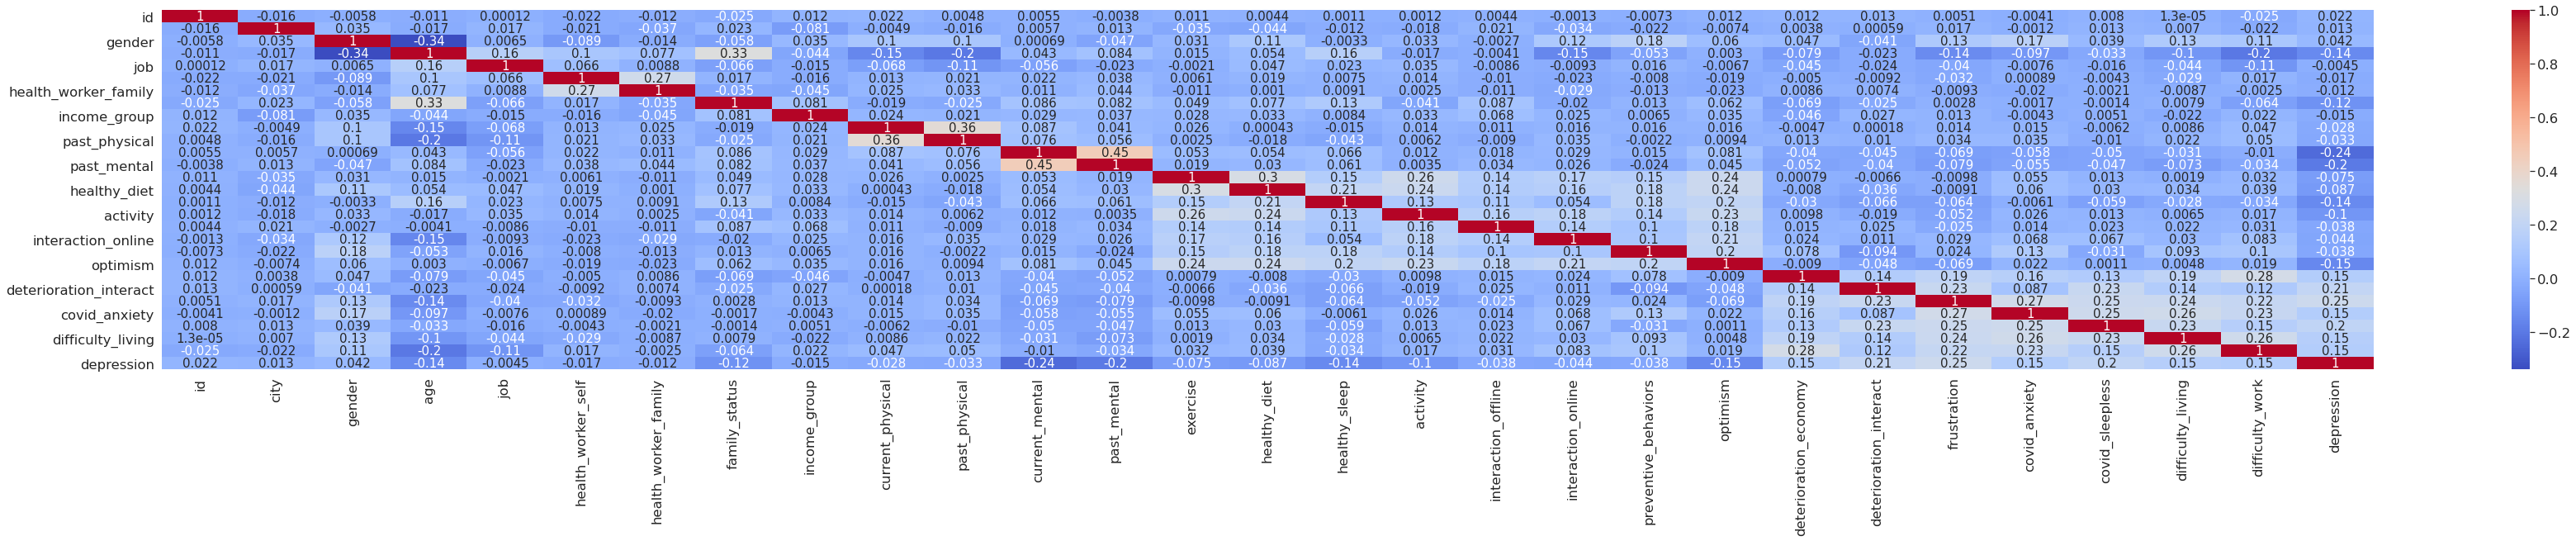

In [6]:
plt.figure(figsize=(60, 8))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

In [7]:
important_features = ['id', 'current_mental', 'past_mental', 'past_physical', 'current_physical', 'optimism', 'deterioration_interact', 'frustration', 'difficulty_work', 'difficulty_living', 'deterioration_economy', 'healthy_sleep']

In [8]:
new_train = pd.DataFrame()
for feature in important_features:
    new_train[feature] = train[feature]
new_train["depression"] = train["depression"]
new_train.head()

,id,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact,frustration,difficulty_work,difficulty_living,deterioration_economy,healthy_sleep,depression
0,1963059261,2,2,1,2,4,1,5,5,6,1,5,0
1,591108995,2,2,2,2,4,4,4,5,4,5,4,0
2,613190420,2,2,2,2,5,1,1,1,1,1,6,0
3,1011726889,2,2,2,2,7,1,7,1,1,1,6,0
4,345550215,2,2,2,2,5,1,1,4,1,2,5,0


In [9]:
one_hot_encoded_training_predictors = pd.get_dummies(new_train)
one_hot_encoded_training_predictors.head()

,id,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact,frustration,difficulty_work,difficulty_living,deterioration_economy,healthy_sleep,depression
0,1963059261,2,2,1,2,4,1,5,5,6,1,5,0
1,591108995,2,2,2,2,4,4,4,5,4,5,4,0
2,613190420,2,2,2,2,5,1,1,1,1,1,6,0
3,1011726889,2,2,2,2,7,1,7,1,1,1,6,0
4,345550215,2,2,2,2,5,1,1,4,1,2,5,0


In [10]:
new_test = pd.DataFrame()
for feature in important_features:
    new_test[feature] = test[feature]
new_test.head()

,id,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact,frustration,difficulty_work,difficulty_living,deterioration_economy,healthy_sleep
0,828763412,2,2,2,2,6,4,5,2,5,4,7
1,2009293273,2,2,2,2,5,1,1,5,1,5,7
2,360753013,2,2,2,2,7,1,3,3,2,1,1
3,321912830,2,2,2,2,1,2,2,5,6,2,6
4,1090960107,2,1,1,2,2,3,5,7,7,5,6


In [11]:
one_hot_encoded_test = pd.get_dummies(new_test)
one_hot_encoded_test.head()

,id,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact,frustration,difficulty_work,difficulty_living,deterioration_economy,healthy_sleep
0,828763412,2,2,2,2,6,4,5,2,5,4,7
1,2009293273,2,2,2,2,5,1,1,5,1,5,7
2,360753013,2,2,2,2,7,1,3,3,2,1,1
3,321912830,2,2,2,2,1,2,2,5,6,2,6
4,1090960107,2,1,1,2,2,3,5,7,7,5,6


In [12]:
print(len(one_hot_encoded_training_predictors))

8610


In [13]:
X_trainTest = one_hot_encoded_training_predictors.drop(columns = "depression")
Y_trainTest = one_hot_encoded_training_predictors["depression"]

# KFOLD

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X_trainTest)


KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_trainTest):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = X_trainTest.iloc[train_index], X_trainTest.iloc[test_index]
    y_train, y_val = Y_trainTest.iloc[train_index], Y_trainTest.iloc[test_index]

TRAIN: [4305 4306 4307 ... 8607 8608 8609] TEST: [   0    1    2 ... 4302 4303 4304]
TRAIN: [   0    1    2 ... 4302 4303 4304] TEST: [4305 4306 4307 ... 8607 8608 8609]


In [15]:
print(len(X_train))

4305


In [16]:
X_testTest = one_hot_encoded_test
X_testTest.head()

,id,current_mental,past_mental,past_physical,current_physical,optimism,deterioration_interact,frustration,difficulty_work,difficulty_living,deterioration_economy,healthy_sleep
0,828763412,2,2,2,2,6,4,5,2,5,4,7
1,2009293273,2,2,2,2,5,1,1,5,1,5,7
2,360753013,2,2,2,2,7,1,3,3,2,1,1
3,321912830,2,2,2,2,1,2,2,5,6,2,6
4,1090960107,2,1,1,2,2,3,5,7,7,5,6


# using random forest

In [17]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

<BarContainer object of 12 artists>

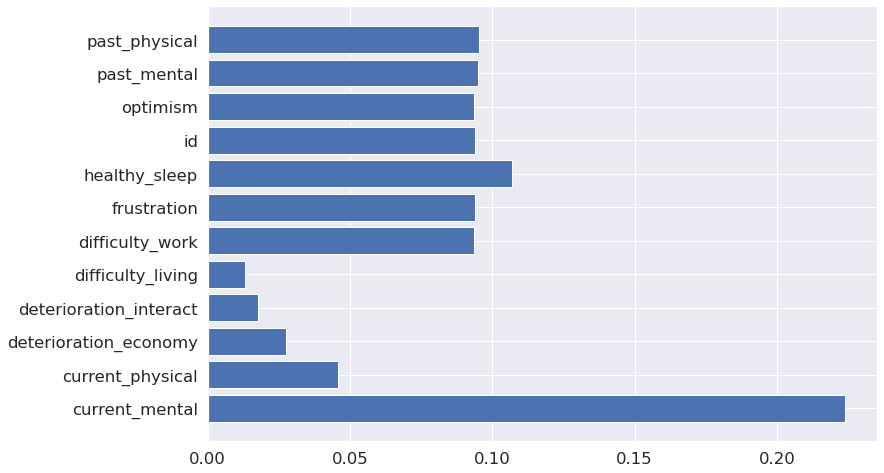

In [18]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.feature_importances_
plt.barh(sorted(X_train), rf.feature_importances_)

In [19]:
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [20]:
Y_val_pred = rf.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, Y_val_pred))

0.7475432392563275


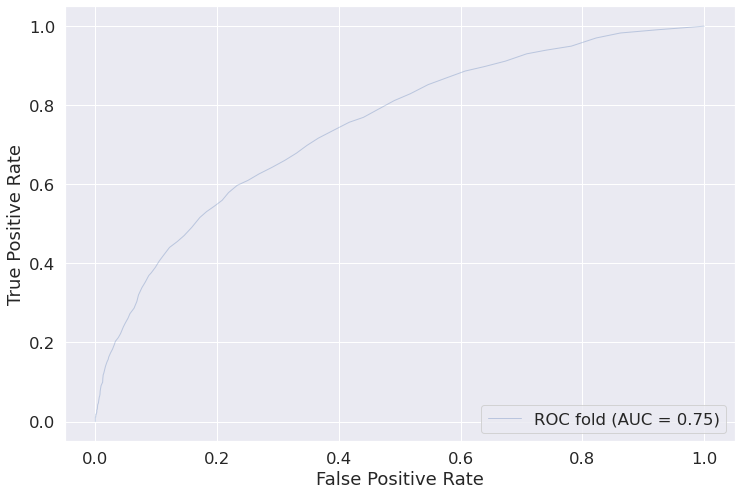

In [21]:
viz = plot_roc_curve(rf, X_val, y_val, name='ROC fold', alpha=0.3, lw=1)

In [22]:
Y_test_pred = rf.predict_proba(X_testTest)[:, 1]

## using decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

In [25]:
from sklearn.model_selection import cross_validate


scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.01336694, 0.0122664 , 0.01362753, 0.01309776, 0.01246548]),
 'score_time': array([0.00247145, 0.00238061, 0.00253224, 0.00247955, 0.00263786]),
 'test_score': array([0.85714286, 0.8699187 , 0.85598142, 0.85365854, 0.84552846])}

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

clfs = []
clfs.append(SVC(probability = True))
clfs.append(LogisticRegression())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
#clfs.append(GradientBoostingClassifier())
clfs.append(AdaBoostClassifier(n_estimators=100, random_state=0))
clfs.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
clfs.append(ExtraTreesClassifier(n_estimators=10000, max_depth=8, min_samples_split=10, random_state=0)
)
for i, classifier in enumerate(clfs):
    pipeline.set_params(clf = classifier)
    #scores = cross_validate(pipeline, X_train, y_train)
    y_pred = cross_val_predict(pipeline, X_val, y_val, cv=3, method = "predict_proba")[:, 1]
    
    if i==1:
        pipeline.fit(X_train, y_train)
        y_test_pred = pipeline.predict_proba(X_testTest)[:, 1]
        
    print(str(classifier))
    print("roc_score", roc_auc_score(y_val, y_pred))
    print("--------------------------")
    

SVC(probability=True)
roc_score 0.7098229675812473
--------------------------
LogisticRegression()
roc_score 0.7732915416211247
--------------------------
KNeighborsClassifier(n_neighbors=3)
roc_score 0.6414173216247058
--------------------------
DecisionTreeClassifier()
roc_score 0.5954154830209756
--------------------------
RandomForestClassifier()
roc_score 0.7545298666210578
--------------------------
AdaBoostClassifier(n_estimators=100, random_state=0)
roc_score 0.7596638602126686
--------------------------
GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
roc_score 0.7691799039008864
--------------------------
ExtraTreesClassifier(max_depth=8, min_samples_split=10, n_estimators=10000,
                     random_state=0)
roc_score 0.7773482283396178
--------------------------


In [27]:
ensemble_hard = VotingClassifier(estimators=[('lr', clfs[1]), ('extra', clfs[-1])], voting='soft', weights=[0.15, 2])
ensemble_hard = ensemble_hard.fit(X_train, y_train)
y_ensemble_test = ensemble_hard.predict_proba(X_testTest)[:, 1]
print(y_ensemble_test)

[0.15375911 0.03224143 0.12972978 ... 0.14334075 0.2094514  0.24190441]


In [28]:
y_ensemble_val = ensemble_hard.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, y_ensemble_val))

0.7745188363348718


In [29]:
submission = pd.DataFrame({'id':one_hot_encoded_test.id,'depression':y_test_pred})

In [30]:
submission.head()

,id,depression
0,828763412,0.083614
1,2009293273,0.022795
2,360753013,0.031769
3,321912830,0.084218
4,1090960107,0.537809


In [31]:
submission.to_csv("26_Newbies_attempt_logisticExtraVotingkfold_pipeline.csv", index = False)